In [1]:
import torch
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from PIL import Image
import gp
from data import get_data

%load_ext autoreload
%autoreload 2

torch.set_default_dtype(torch.float64)

### Presentation cover:

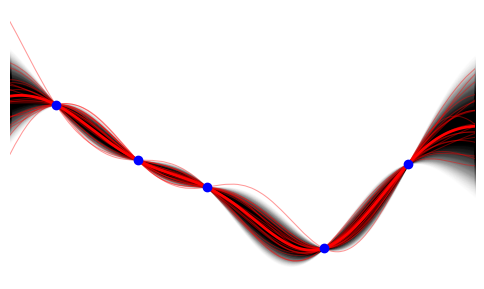

In [362]:
x, y = get_data(5)
x_test = torch.linspace(-3.0, 3.0, 1000)
gp_posterior = gp.gp_posterior(x, y, x_test, sigma_y=0.0)
samps = gp.get_samples(gp_posterior, n=20)
mu, vars = gp.get_mean_and_stds(gp_posterior)
cont_gran = 100

fig, ax = plt.subplots(1, 1, figsize=(6, 3.5))

plt.plot(x_test, mu, color='red', linewidth=2.0, zorder=1000)
for samp in samps:
    ax.plot(x_test, samp, color='red', linewidth=0.75, alpha=0.4)
for cont in range(cont_gran):
    c = cont / cont_gran
    plt.fill_between(x_test, mu-2*c*vars, mu+2*c*vars, color='black', alpha=0.075*(1-c))
ax.scatter(x, y, color='blue', zorder=10000)
ax.axis('off')
ax.set_xlim((-3.0, 3.0))
plt.show()

### Sampling from a 1d Gaussian:

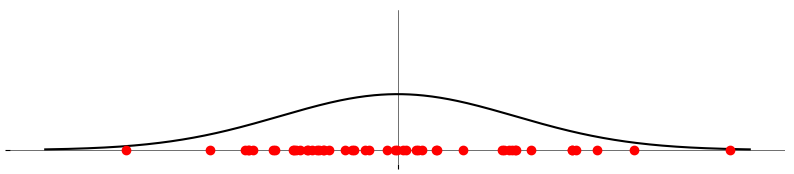

In [37]:
xs = torch.linspace(-3.0, 3.0, 500)
px = torch.exp(- (xs.square()) / (2)) / torch.tensor(2*torch.pi).sqrt()
torch.manual_seed(0)

fig, ax = plt.subplots(1, 1, figsize=(10, 2))

# ax.fill_between(xs, torch.zeros_like(xs), px, color='black', alpha=1.0)
ax.plot(xs, px*0.5, color='black')
ax.set_xticks([0.0])
ax.set_yticks([0.0])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(True, color='black', linewidth=0.4)
ax.set_ylim([-0.05, 0.5])
samps = torch.randn((50,))
ys = torch.zeros_like(samps)
# plt.scatter(samps, torch.zeros_like(samps), color='red')
# plt.show()

scat = ax.scatter([], [], color='red', zorder=1000)
# Function to update the scatter plot for each frame
def animate(i):
    scat.set_offsets((torch.cat((samps[:i].unsqueeze(-1), ys[:i].unsqueeze(-1)), dim=1)))
    return scat,
fps=10
ani = animation.FuncAnimation(fig, animate, frames=len(samps), interval=100, blit=True)
ani.save('figs/1d_gaussian.mp4', writer='ffmpeg', fps=fps)

### Sampling from a 2d Gaussian:

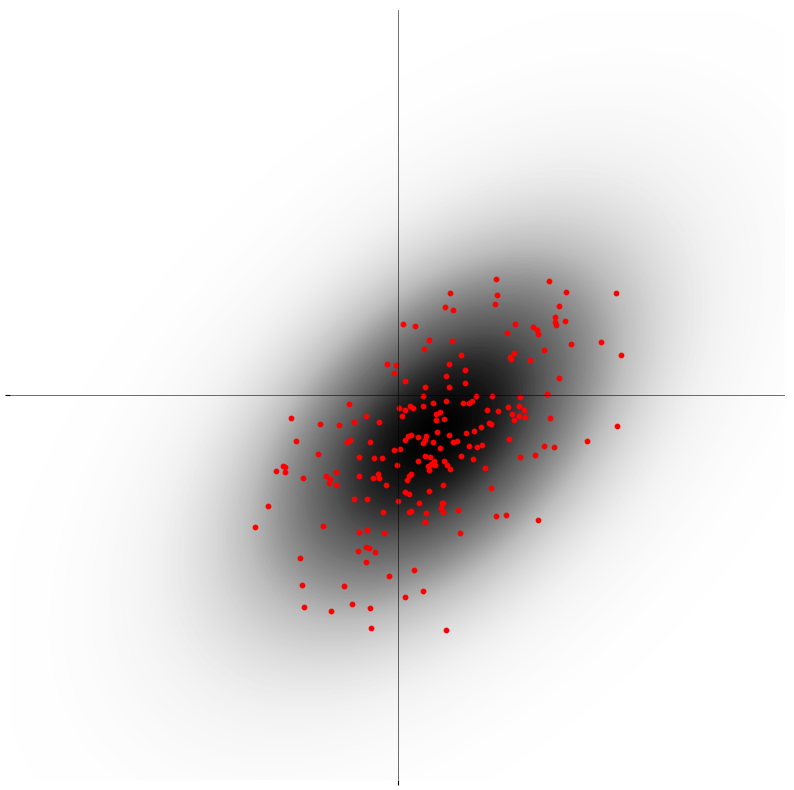

In [120]:
x1s = torch.linspace(-6.0, 6.0, 250)
x2s = torch.linspace(-6.0, 6.0, 250)
X1s, X2s = torch.meshgrid(x1s, x2s)
coords = torch.cat((X1s.unsqueeze(-1), X2s.unsqueeze(-1)), dim=-1)

gauss2d = torch.distributions.MultivariateNormal(loc=torch.tensor([0.5, -0.5]), covariance_matrix=torch.tensor([[1.0, 0.5], [0.5, 1.0]]))
probs = gauss2d.log_prob(coords).exp().pow(1/3)
samps = gauss2d.sample((200,))

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.contourf(X1s, X2s, probs, levels=200, cmap='Greys')
ax.set_xticks([0.0])
ax.set_yticks([0.0])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(True, color='black', linewidth=0.4)
ax.set_xlim([-5.0, 5.0])
ax.set_ylim([-5.0, 5.0])

# ys = torch.linspace(-6.0, 6.0, 250)
# dist = torch.distributions.Normal(loc=-0.5, scale=1.0)
# xs = dist.log_prob(ys).exp().pow(1/3)
# ax.plot(xs*4, ys, color='black')
# plt.show()

scat = ax.scatter([], [], color='red', s=10.0)
def animate(i):
    scat.set_offsets(samps[:i,:])
    return scat,
ani = animation.FuncAnimation(fig, animate, frames=range(len(samps)), interval=100, blit=True)
ani.save('figs/2d_gaussian3.mp4', writer='ffmpeg', fps=25)

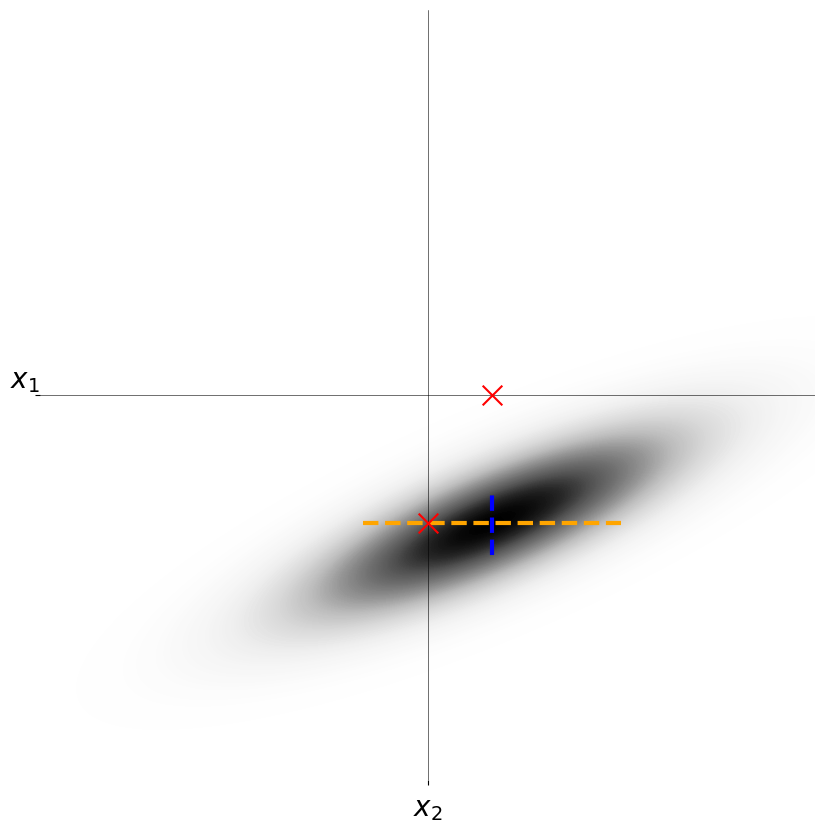

In [108]:
x1s = torch.linspace(-3.0, 3.0, 250)
x2s = torch.linspace(-3.0, 3.0, 250)
X1s, X2s = torch.meshgrid(x1s, x2s)
coords = torch.cat((X1s.unsqueeze(-1), X2s.unsqueeze(-1)), dim=-1)

gauss2d = torch.distributions.MultivariateNormal(loc=torch.tensor([0.5, -1.0]), covariance_matrix=torch.tensor([[1.0, 0.4], [0.4, 0.25]]))
probs = gauss2d.log_prob(coords).exp()
samps = gauss2d.sample((200,))

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.contourf(X1s, X2s, probs, levels=200, cmap='Greys')
ax.set_xticks([0.0])
ax.set_yticks([0.0])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(True, color='black', linewidth=0.4)
ax.set_xlim([-3.0, 3.0])
ax.set_ylim([-3.0, 3.0])

ax.set_xlabel(r'$x_2$', fontsize=20)
ax.set_ylabel(r'$x_1$', fontsize=20, rotation=0)

ax.scatter([0.5, 0], [0, -1.0], color='red', marker='x', s=200, zorder=10000)
x1_range = torch.linspace(0.5 - 1.0, 0.5 + 1.0, 100)
x1_x2s = torch.ones_like(x1_range) * (-1.0)
x2_range = torch.linspace(-1.0 - 0.25, -1.0 + 0.25, 100)
x2_x1s = torch.ones_like(x2_range) * (0.5)

ax.plot(x1_range, x1_x2s, color='orange', linestyle='dashed', linewidth=3)
ax.plot(x2_x1s, x2_range, color='blue', linestyle='dashed', linewidth=3)


plt.show()


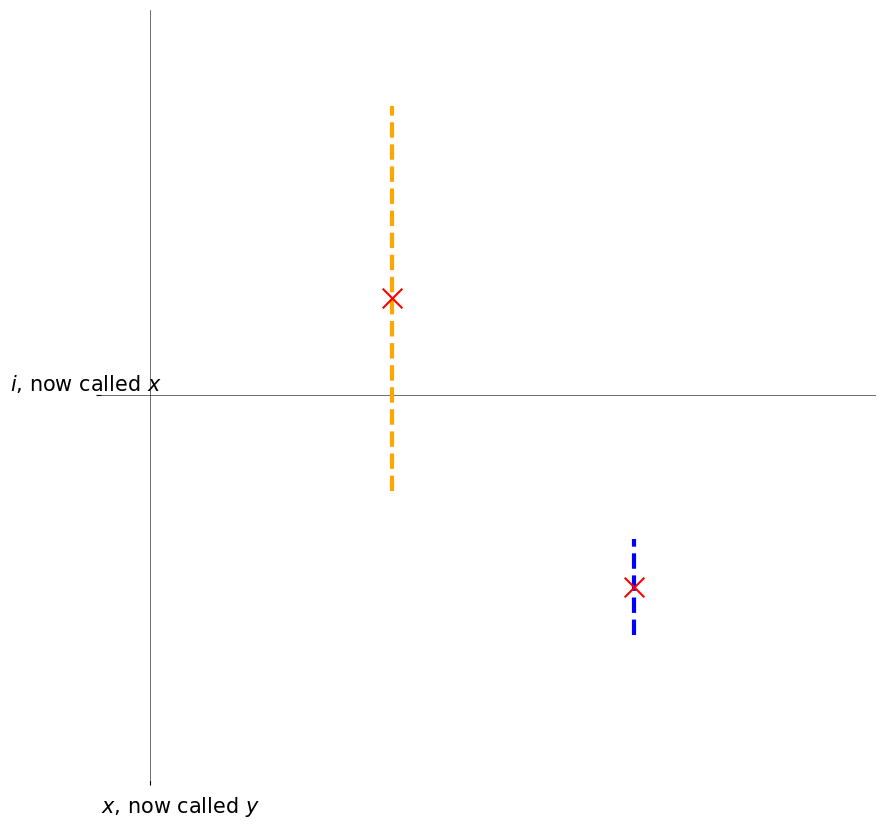

In [109]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_xticks([0.0])
ax.set_yticks([0.0])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(True, color='black', linewidth=0.4)
ax.set_xlim([-0.2, 3.0])
ax.set_ylim([-2.0, 2.0])
ax.set_xlabel(r'$x$, now called $y$', fontsize=15, rotation=0, loc='left')
ax.set_ylabel(r'$i$, now called $x$', fontsize=15, rotation=0)

ax.scatter([1.0, 2.0], [0.5, -1.0], color='red', marker='x', s=200, zorder=10000)
x1_range = torch.linspace(0.5 - 1, 0.5 + 1, 100)
x1_x2s = torch.ones_like(x1_range) * (1)
x2_range = torch.linspace(-1.0 - 0.25, -1.0 + 0.25, 100)
x2_x1s = torch.ones_like(x2_range) * (2)

ax.plot(x1_x2s, x1_range, color='orange', linestyle='dashed', linewidth=3)
ax.plot(x2_x1s, x2_range, color='blue', linestyle='dashed', linewidth=3)

plt.show()

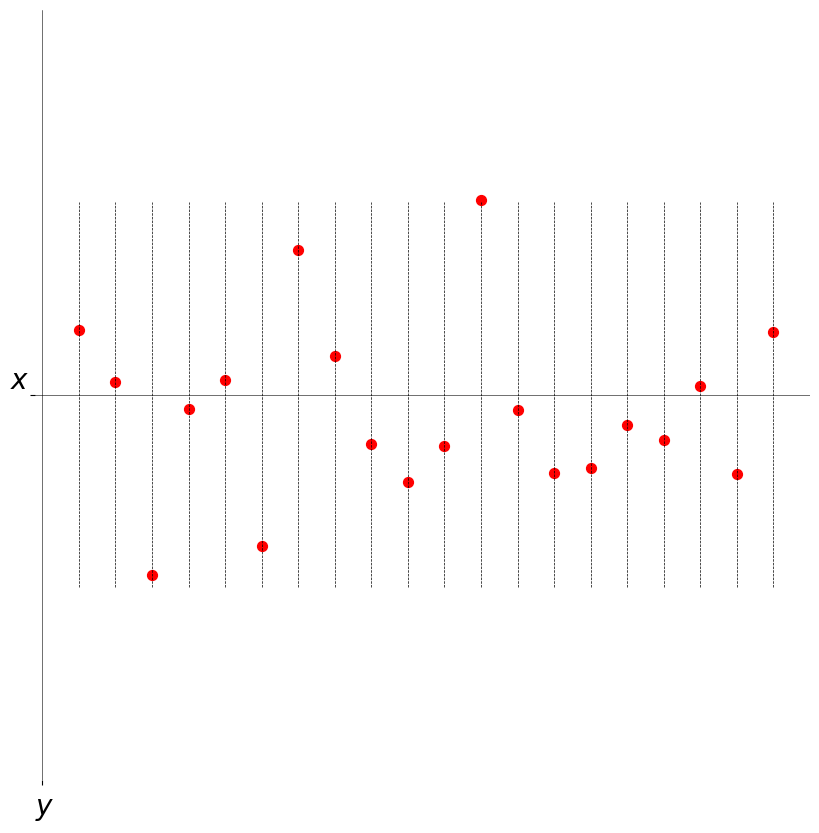

In [131]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_xticks([0.0])
ax.set_yticks([0.0])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(True, color='black', linewidth=0.4)
ax.set_xlim([-0.2, 21.0])
ax.set_ylim([-4.0, 4.0])
ax.set_xlabel(r'$y$', fontsize=20, rotation=0, loc='left')
ax.set_ylabel(r'$x$', fontsize=20, rotation=0)

xs = torch.arange(1.0, 21.0, step=1.0)
stds = torch.ones_like(xs)
ys = torch.zeros_like(xs)
# ax.scatter(xs, ys, color='red', marker='x', s=100, zorder=10000)

for i, x in enumerate(xs):
    error_bars = torch.linspace(ys[i] - 2*stds[i], ys[i] + 2*stds[i], 100)
    error_bar_xs = torch.ones_like(error_bars) * x
    ax.plot(error_bar_xs, error_bars, color='black', linestyle='dashed', linewidth=0.5)

gauss5d = torch.distributions.MultivariateNormal(loc=ys, covariance_matrix=torch.eye(20))
samps = gauss5d.sample((25,))

scat = ax.scatter([], [], color='red', s=50.0)
def animate(i):
    scat.set_offsets(torch.cat((xs.unsqueeze(-1), samps[i,:].unsqueeze(-1)), dim=-1))
    return scat,
ani = animation.FuncAnimation(fig, animate, frames=range(len(samps)), interval=50, blit=True)
ani.save('figs/20d_gaussian_uncorr.mp4', writer='ffmpeg', fps=2)

plt.show()

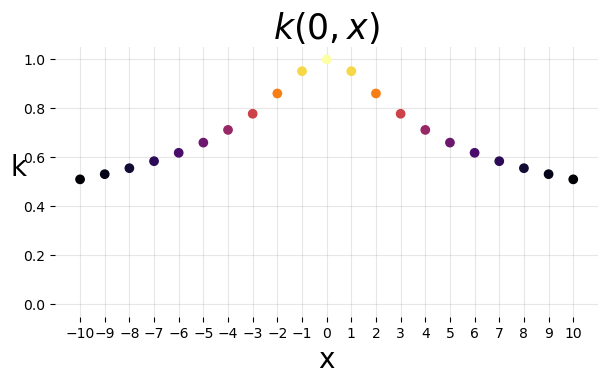

In [171]:
xs = torch.arange(-10.0, 11.0, step=1.0)
# covs = (-xs.pow(2)/(2*3**2)).exp()
# covs = (-xs.abs()/3).exp()
covs = (1 + xs.pow(2)/(2*0.2*3**2)).pow(-0.2)

fig, ax = plt.subplots(1, 1, figsize=(7, 3.5))
ax.scatter(xs, covs, zorder=1000, c=covs, cmap='inferno')
ax.grid(alpha=0.3)
ax.set_xticks(xs)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_title(r'$k(0, x)$', fontsize=25)
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('k', fontsize=20, rotation=0)
ax.set_ylim([-0.05, 1.05])
plt.show()

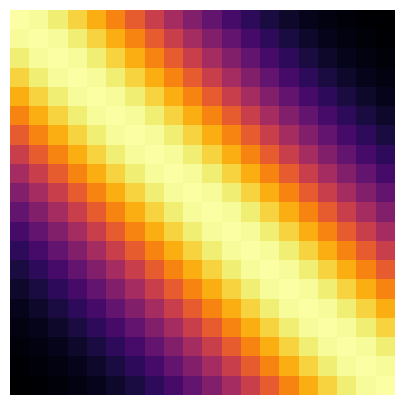

In [178]:
# xs = torch.linspace(0.6, 3.6, 5)
xs = torch.linspace(0.15, 3.15, 20)
gp_prior = gp.gp_prior(xs)
c = gp_prior.covariance_matrix

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.axis('off')

ax.imshow(c, cmap='inferno')
plt.show()


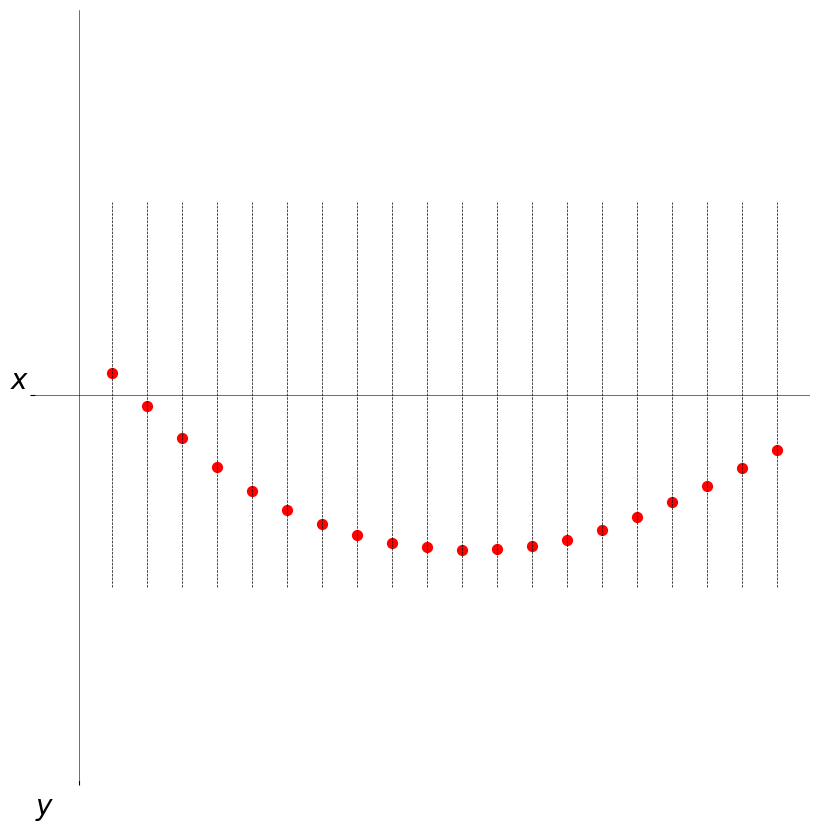

In [183]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_xticks([0.0])
ax.set_yticks([0.0])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(True, color='black', linewidth=0.4)
ax.set_xlim([-0.2, 3.3])
ax.set_ylim([-4.0, 4.0])
ax.set_xlabel(r'$y$', fontsize=20, rotation=0, loc='left')
ax.set_ylabel(r'$x$', fontsize=20, rotation=0)

xs = torch.linspace(0.15, 3.15, 20)
gp_prior = gp.gp_prior(xs)
stds = torch.ones_like(xs)
ys = torch.zeros_like(xs)
# ax.scatter(xs, ys, color='red', marker='x', s=100, zorder=10000)

for i, x in enumerate(xs):
    error_bars = torch.linspace(ys[i] - 2*stds[i], ys[i] + 2*stds[i], 100)
    error_bar_xs = torch.ones_like(error_bars) * x
    ax.plot(error_bar_xs, error_bars, color='black', linestyle='dashed', linewidth=0.5)

samps = gp.get_samples(gp_posterior, n=100)
scat = ax.scatter([], [], color='red', s=50.0)
def animate(i):
    scat.set_offsets(torch.cat((xs.unsqueeze(-1), samps[i,:].unsqueeze(-1)), dim=-1))
    return scat,
ani = animation.FuncAnimation(fig, animate, frames=range(len(samps)), interval=50, blit=True)
ani.save('figs/20d_gaussian_se.mp4', writer='ffmpeg', fps=2)

plt.show()

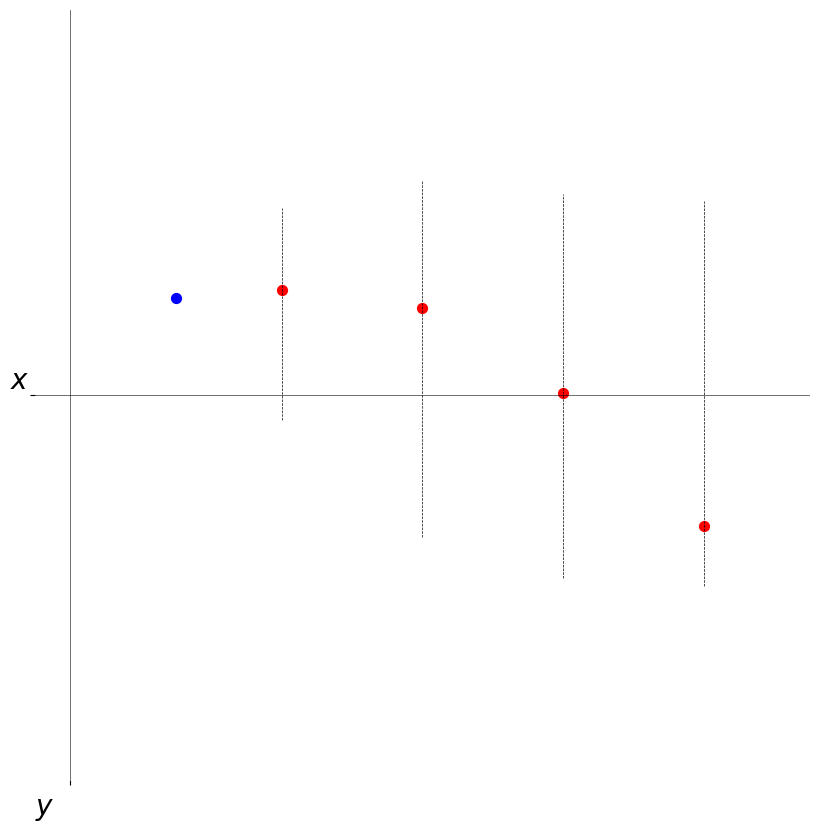

In [199]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_xticks([0.0])
ax.set_yticks([0.0])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(True, color='black', linewidth=0.4)
# ax.set_xlim([-0.2, 3.3])
ax.set_xlim([-0.2, 4.2])
ax.set_ylim([-4.0, 4.0])
ax.set_xlabel(r'$y$', fontsize=20, rotation=0, loc='left')
ax.set_ylabel(r'$x$', fontsize=20, rotation=0)

# xs = torch.linspace(0.45, 3.15, 18)
# obs_x = torch.tensor([0.15, 0.30])
# obs_y = torch.tensor([0.6, 1.0])
xs = torch.linspace(1.2, 3.6, 4)
obs_x = torch.tensor([0.6])
obs_y = torch.tensor([1.0])
gp_posterior = gp.gp_posterior(obs_x, obs_y, xs)
stds = gp_posterior.covariance_matrix.diagonal().pow(0.5)
means = gp_posterior.mean

for i, x in enumerate(xs):
    error_bars = torch.linspace(means[i] - 2*stds[i], means[i] + 2*stds[i], 100)
    error_bar_xs = torch.ones_like(error_bars) * x
    ax.plot(error_bar_xs, error_bars, color='black', linestyle='dashed', linewidth=0.5)

samps = gp_posterior.sample((25,))
ax.scatter(obs_x, obs_y, color='blue', s=50)
scat = ax.scatter([], [], color='red', s=50.0)
def animate(i):
    scat.set_offsets(torch.cat((xs.unsqueeze(-1), samps[i,:].unsqueeze(-1)), dim=-1))
    return scat,
ani = animation.FuncAnimation(fig, animate, frames=range(len(samps)), interval=50, blit=True)
ani.save('figs/5d_gaussian_post.mp4', writer='ffmpeg', fps=2)

plt.show()

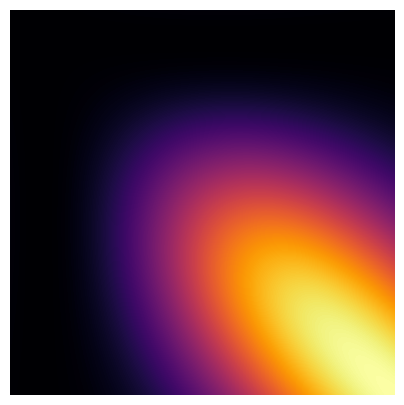

In [273]:
# xs = torch.linspace(0.6, 3.6, 5)
# obs_x = torch.tensor([0.6])
# obs_y = torch.tensor([1.0])
xs = torch.linspace(0, 3, 400)
obs_x = torch.tensor([0.15, 0.30])
obs_y = torch.tensor([0.6, 1.0])
gp_posterior = gp.gp_posterior(obs_x, obs_y, xs)

c = gp_posterior.covariance_matrix

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.axis('off')

ax.imshow(c, cmap='inferno')
plt.show()

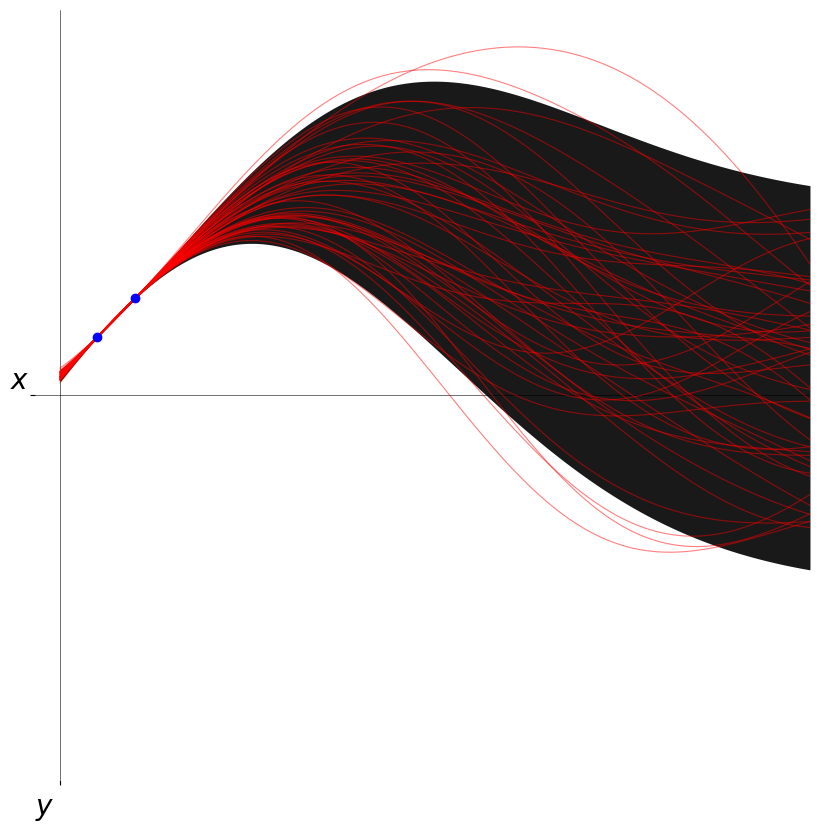

In [240]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_xticks([0.0])
ax.set_yticks([0.0])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(True, color='black', linewidth=0.4)
ax.set_xlim([-0.1, 3.])
ax.set_ylim([-4.0, 4.0])
ax.set_xlabel(r'$y$', fontsize=20, rotation=0, loc='left')
ax.set_ylabel(r'$x$', fontsize=20, rotation=0)

xs = torch.linspace(0, 3, 200)
obs_x = torch.tensor([0.15, 0.30])
obs_y = torch.tensor([0.6, 1.0])
gp_posterior = gp.gp_posterior(obs_x, obs_y, xs)
mu, stds = gp.get_mean_and_stds(gp_posterior)
cont_gran = 100
samps = gp.get_samples(gp_posterior, n=50)

plt.fill_between(xs, mu-2*stds, mu+2*stds, color='black', alpha=0.9, linewidth=0.0)
ax.scatter(obs_x, obs_y, color='blue', zorder=10000)

# plot = ax.plot([], [], color='red', linewidth=1, alpha=0.5)[0]
def animate(i):
    if i>0:
        plot = ax.plot(xs, samps[i,:], color='red', linewidth=0.8, alpha=0.5)[0]
    else:
        return ax.plot([], [], color='red', linewidth=1, alpha=0.5)[0]
    return plot,
ani = animation.FuncAnimation(fig, animate, frames=range(len(samps)), interval=50, blit=False)
ani.save('figs/gp_post1.mp4', writer='ffmpeg', fps=8)

plt.show()

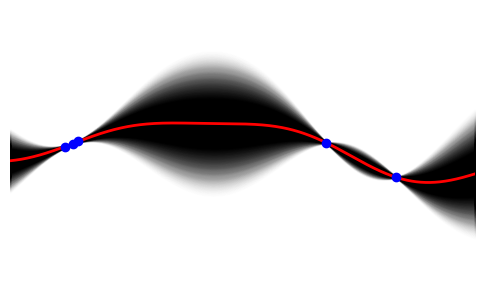

In [271]:
x, y = get_data(5)
x_test = torch.linspace(-3.0, 3.0, 500)
cont_gran = 100
sigs=torch.logspace(-1.7, 0.3, 500)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.5))


def animate(i):
    gp_posterior = gp.gp_posterior(x, y, x_test, sigma_y=sigs[i])
    mu, stds = gp.get_mean_and_stds(gp_posterior)
    plt.cla()
    ax.scatter(x, y, color='blue', zorder=10000)
    ax.axis('off')
    ax.set_xlim((-3.0, 3.0))
    ax.set_ylim((-3.0, 3.0))
    ax.plot(x_test, mu, color='red', linewidth=2.0, zorder=1000)
    # ax.fill_between(x_test, mu-2*stds, mu+2*stds, color='black', alpha=0.8, linewidth=0.0)
    for cont in range(cont_gran):
        c = cont / cont_gran
        plt.fill_between(x_test, mu-2*c*stds, mu+2*c*stds, color='black', alpha=0.1*(1-c))
    return ax,
ani = animation.FuncAnimation(fig, animate, frames=range(len(sigs)), interval=50, blit=False)
ani.save('figs/gp_post_sigs.mp4', writer='ffmpeg', fps=60)

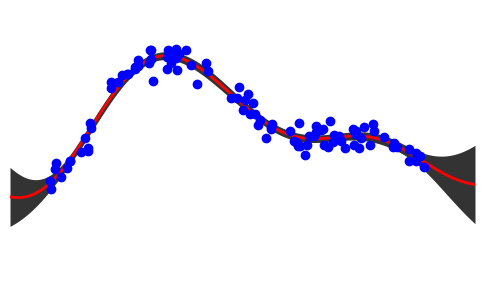

In [300]:
x, y = get_data(100, noise=0.2)
x_test = torch.linspace(-3.0, 3.0, 1000)
cont_gran = 100
training_steps = 400

geepee = gp.GP(sigma_y = 0.2, learn_sigma_y=True)
opt = torch.optim.Adam(geepee.parameters(), lr=1e-2)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.5))

def animate(i):
    with torch.no_grad():
        gp_posterior = geepee(x_test, X=x, y=y)
    mu, stds = gp.get_mean_and_stds(gp_posterior)
    plt.cla()
    ax.scatter(x, y, color='blue', zorder=10000)
    ax.axis('off')
    ax.set_xlim((-3.0, 3.0))
    ax.set_ylim((-3.0, 3.0))
    ax.plot(x_test, mu, color='red', linewidth=2.0, zorder=1000)
    ax.fill_between(x_test, mu-2*stds, mu+2*stds, color='black', alpha=0.8, linewidth=0.0)
    # for cont in range(cont_gran):
    #     c = cont / cont_gran
    #     plt.fill_between(x_test, mu-2*c*stds, mu+2*c*stds, color='black', alpha=0.1*(1-c))

    opt.zero_grad()
    l = - geepee.log_marginal_likelihood(x, y)
    l.backward()
    opt.step()

    return ax,
ani = animation.FuncAnimation(fig, animate, frames=range(training_steps), interval=50, blit=False)
ani.save('figs/gp_learning_sig.mp4', writer='ffmpeg', fps=60)